In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
train_df = pd.read_csv('Q1_train.csv')
test_df = pd.read_csv('Q1_test.csv')

In [4]:
# printing train and test dataset shapes
print("train dataframe shape: ", train_df.shape)
print("test dataframe shape: ", test_df.shape)

train dataframe shape:  (909, 5)
test dataframe shape:  (461, 5)


In [5]:
# looking at the first 5 rows of the train and test datasets
print("train df head: ", train_df.head())
print("test df head: ", test_df.head())

train df head:      3.6216  8.6661  -2.8073  -0.44699  0
0  4.54590  8.1674  -2.4586  -1.46210  0
1  3.86600 -2.6383   1.9242   0.10645  0
2  3.45660  9.5228  -4.0112  -3.59440  0
3  0.32924 -4.4552   4.5718  -0.98880  0
4  4.36840  9.6718  -3.9606  -3.16250  0
test df head:     3.8644   3.7061  0.70403  0.35214  0
0  1.2999  2.57620  2.01070 -0.18967  0
1  2.0051 -6.86380  8.13200 -0.24010  0
2  4.9294  0.27727  0.20792  0.33662  0
3  2.8297  6.34850 -0.73546 -0.58665  0
4  2.5650  8.63300 -2.99410 -1.30820  0


In [6]:
# separating Features (X) and Labels (y)
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

In [7]:
# to make sure the shapes are correct
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (909, 4)
y_train shape: (909,)
X_test shape: (461, 4)
y_test shape: (461,)


In [13]:
k_values = [i for i in range(1, 10)]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    correct_predictions = (y_test == y_pred).sum()
    acc = accuracy_score(y_test, y_pred)
    results.append((k, correct_predictions, acc))

results_df = pd.DataFrame(results, columns=['K', 'No. of Correct Predictions', 'Accuracy'])
print(results_df)

   K  No. of Correct Predictions  Accuracy
0  1                         461       1.0
1  2                         461       1.0
2  3                         461       1.0
3  4                         461       1.0
4  5                         461       1.0
5  6                         461       1.0
6  7                         461       1.0
7  8                         461       1.0
8  9                         461       1.0


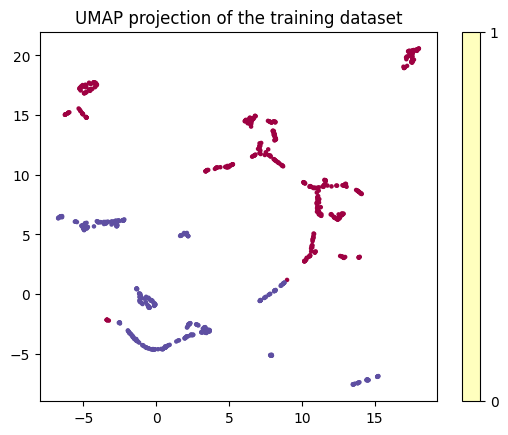

In [13]:
import umap
import matplotlib.pyplot as plt

# Assuming you have already loaded the training data into X_train and y_train
reducer_train = umap.UMAP()

# Apply UMAP to training data only
embedding_train = reducer_train.fit_transform(X_train)

# Plot the 2D projection for the training data
plt.scatter(embedding_train[:, 0], embedding_train[:, 1], c=y_train, cmap='Spectral', s=5)
plt.colorbar(boundaries=[0, 1])
plt.title('UMAP projection of the training dataset')
plt.show()


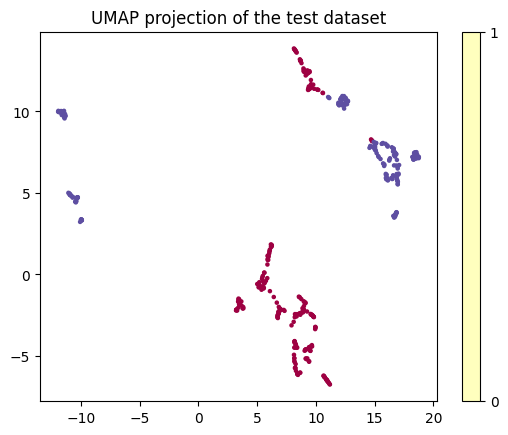

In [14]:
# Apply UMAP to test data only
reducer_test = umap.UMAP()

embedding_test = reducer_test.fit_transform(X_test)

# Plot the 2D projection for the test data
plt.scatter(embedding_test[:, 0], embedding_test[:, 1], c=y_test, cmap='Spectral', s=5)
plt.colorbar(boundaries=[0, 1])
plt.title('UMAP projection of the test dataset')
plt.show()
